# Model Learning


To Do: 

Andere Modelle implementieren,

Evalutaion erstellen der verschiedenen Modelle und vergleichen,

Schauen ob schon erste Testläufe mit den bereits preprocesseden daten möglich sind, 

Pipeline

Hyper Parameter Optimization

In [495]:
import pandas as pd


### Vorgehen für die Modelle

3 Modelle:

1) Modell mit Daten von 2018-heute mit allen Attributen

2) Modell mit Daten von 1996-huete nur mit Attributen die diese Daten gemeinsam haben 

3) Modell von 1950 - heute nur mit Attributen die alle Daten gemeinsam haben 


--> Ensemble Vote der 3 Modelle 

# Modell 1 

## Preprocessing

In which shape is the preprocessed data? Are additional preprocessing techniques necessary for different models ?

Is there already an train-test(-validation) split?

Binning, Boosting & stratified sampling

Encoding necessary?

In [496]:
#Modell 1

df1 = pd.read_csv('../data/processed/export_2018_full_v1.csv') #Hat nur daten von 2018-2024 ???

In [497]:
df1.head()

,resultId,raceId,driverId,constructorId,number,grid,year,round,circuitId,race_name,race_date,race_time,fp1_date,fp2_date,fp3_date,fp1_time,fp2_time,fp3_time,quali_time,quali_date,race_location,race_country,race_lat,race_lng,race_alt,q1,q2,q3,position,driver_dob,driver_nationality,driver_code,min_pit_stop_duration,max_pit_stop_duration,avg_pit_stop_duration,std_pit_stop_duration,milliseconds_count,pit_stop_count,min_pit_stop_lap,max_pit_stop_lap,avg_pit_stop_lap,std_pit_stop_lap,avg_pit_stop_driver,avg_pit_stop_team,avg_pit_stop_track,avg_pit_stop_season,rolling_avg_pit_stop_driver,rolling_avg_pit_stop_team,rolling_avg_pit_stop_track,rolling_avg_pit_stop_season,driver,q1_time,q2_time,q3_time,q_position,fp1_avg_sector_1,fp1_avg_sector_2,fp1_avg_lap_time,fp1_avg_speedI1,fp1_avg_speedI2,fp1_avg_speedFL,fp1_avg_speedST,fp1_avg_tyre_life,fp1_avg_is_on_fresh_tyres,fp2_avg_sector_1,fp2_avg_sector_2,fp2_avg_lap_time,fp2_avg_speedI1,fp2_avg_speedI2,fp2_avg_speedFL,fp2_avg_speedST,fp2_avg_tyre_life,fp2_avg_is_on_fresh_tyres,fp3_avg_sector_1,fp3_avg_sector_2,fp3_avg_lap_time,fp3_avg_speedI1,fp3_avg_speedI2,fp3_avg_speedFL,fp3_avg_speedST,fp3_avg_tyre_life,fp3_avg_is_on_fresh_tyres
0,23782,989,20,6,5,3,2018,1,1,Australian Grand Prix,2018-03-25,05:10:00,\N,\N,\N,\N,\N,\N,\N,\N,Melbourne,Australia,-37.8497,144.968,10,1:23.348,1:21.944,1:21.838,3.0,1987-07-03,German,VET,21787.0,21787.0,21787.0,0.0,1.0,1.0,26.0,26.0,26.0,0.0,235976.200000,37075.632937,136768.016807,24639.648649,235976.2,235976.2,235976.2,25191.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23783,989,1,131,44,1,2018,1,1,Australian Grand Prix,2018-03-25,05:10:00,\N,\N,\N,\N,\N,\N,\N,\N,Melbourne,Australia,-37.8497,144.968,10,1:22.824,1:22.051,1:21.164,1.0,1985-01-07,British,HAM,21821.0,21821.0,21821.0,0.0,1.0,1.0,19.0,19.0,19.0,0.0,33408.959596,174568.428571,119521.000000,85900.376467,235561.8,235561.8,235561.8,85900.376467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23784,989,8,6,7,2,2018,1,1,Australian Grand Prix,2018-03-25,05:10:00,\N,\N,\N,\N,\N,\N,\N,\N,Melbourne,Australia,-37.8497,144.968,10,1:23.096,1:22.507,1:21.828,2.0,1979-10-17,Finnish,RAI,21421.0,21421.0,21421.0,0.0,1.0,1.0,18.0,18.0,18.0,0.0,175877.714286,35074.477528,195292.316667,24391.540000,236755.2,236755.2,236755.2,30961.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23785,989,817,9,3,8,2018,1,1,Australian Grand Prix,2018-03-25,05:10:00,\N,\N,\N,\N,\N,\N,\N,\N,Melbourne,Australia,-37.8497,144.968,10,1:23.494,1:22.897,1:22.152,5.0,1989-07-01,Australian,RIC,21440.0,21440.0,21440.0,0.0,1.0,1.0,26.0,26.0,26.0,0.0,112315.376106,75383.610338,137356.063927,24578.241758,235802.0,235802.0,235802.0,26558.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23786,989,4,1,14,10,2018,1,1,Australian Grand Prix,2018-03-25,05:10:00,\N,\N,\N,\N,\N,\N,\N,\N,Melbourne,Australia,-37.8497,144.968,10,1:23.597,1:23.692,\N,11.0,1981-07-29,Spanish,ALO,22573.0,22573.0,22573.0,0.0,1.0,1.0,26.0,26.0,26.0,0.0,22140.000000,22657.319149,206946.806452,23008.192308,22140.0,21623.6,235443.8,22696.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Calculating Driver Age

In [498]:
from datetime import datetime

#Calculate Age: 
# Convert race_date and driver_dob to datetime
df1['race_date'] = pd.to_datetime(df1['race_date'])
df1['driver_dob'] = pd.to_datetime(df1['driver_dob'])

# Calculate age
df1['age'] = df1.apply(lambda row: row['race_date'].year - row['driver_dob'].year - ((row['race_date'].month, row['race_date'].day) < (row['driver_dob'].month, row['driver_dob'].day)), axis=1)

# Drop driver_dob column
df1 = df1.drop(columns=['driver_dob'])

#### Drop Irrelevant Columns

In [499]:
#Folgende 'object' Attribute werden erstmal gedroppt:
#race_date, race_time, fp1_date, fp2_date, fp3_date, fp1_time, fp2_time, fp3_time, quali_time, quali_date, race_location, race_country, driver_dob
df1 = df1.drop(columns=['race_date', 'race_time', 'fp1_date', 'fp2_date', 'fp3_date', 'fp1_time', 'fp2_time', 'fp3_time', 'quali_time', 'quali_date', 'race_location', 'race_country'])

In [500]:
#Folgende Spalten müssen noch gedroppt werden: year, number, resultId, raceId, round, race_name, driver_code
df1 = df1.drop(columns=[ 'driver','number', 'resultId', 'round', 'race_name', 'driver_code'])


In [501]:
# Folgende Attribute werden gedroppt, da sie nicht für jedes Rennen vorhanden sind:
df1 = df1.drop(columns=df1.loc[:, 'fp1_avg_sector_1':'fp3_avg_is_on_fresh_tyres'].columns)


#### Qualifying Zeiten Problem

Problem: Nur total wenige Rennen haben Daten über die Qualifiying? 

Wie man unten sehen kann gibt es nur q1_time zeiten von zeile 2899-1918

q1_time ist der Wert in q1 in tausendstel sekunden.
Die umwandlung hat aber nur selten funktioniert, deswegen mache ich das neu:

In [502]:
# Drop columns 'q1_time', 'q2_time', 'q3_time', and 'q_position' from the dataset
df1 = df1.drop(columns=['q1_time', 'q2_time', 'q3_time', 'q_position'])

In [503]:
#Encoding von q1,q2, q3
#Zeiten müssen in sekunden umgewandelt werden
def convert_to_seconds(time_str):
    if pd.isna(time_str) or time_str == '\\N':
        return 0.0 #falls NaN Wert (nicht erreichen des Q2/Q3) auf 0 gesetzt. Alternative selber Wert?
    minutes, seconds = time_str.split(':')
    return int(minutes) * 60 + float(seconds)

df1['q1'] = df1['q1'].apply(convert_to_seconds)
df1['q2'] = df1['q2'].apply(convert_to_seconds)
df1['q3'] = df1['q3'].apply(convert_to_seconds)

In [504]:
import numpy as np

# Function to calculate qualifying position
#def calculate_q_position(group):
    # Sort by q3, q2, q1
    #group['q3'] = group['q3'].replace('\\N', np.nan).astype(float)
    #group['q2'] = group['q2'].replace('\\N', np.nan).astype(float)
    #group['q1'] = group['q1'].replace('\\N', np.nan).astype(float)
    
    # Initialize q_position with NaN
    #group['q_position'] = np.nan
    
    # Assign positions based on q3
    #q3_sorted = group[group['q3'].notna()].sort_values(by='q3')
    #q3_sorted['q_position'] = range(1, len(q3_sorted) + 1)
    
    # Assign positions based on q2 for those without q3
    #q2_sorted = group[group['q3'].isna() & group['q2'].notna()].sort_values(by='q2')
    #q2_sorted['q_position'] = range(len(q3_sorted) + 1, len(q3_sorted) + len(q2_sorted) + 1)
    
    # Assign positions based on q1 for those without q2 and q3
    #q1_sorted = group[group['q3'].isna() & group['q2'].isna() & group['q1'].notna()].sort_values(by='q1')
    #q1_sorted['q_position'] = range(len(q3_sorted) + len(q2_sorted) + 1, len(q3_sorted) + len(q2_sorted) + len(q1_sorted) + 1)
    
    # Combine all sorted groups
    #combined = pd.concat([q3_sorted, q2_sorted, q1_sorted])
    
    # Fill the original group with calculated q_position
    #group.update(combined)
    
    #return group

# Group by raceId and apply the function
#df1 = df1.groupby('raceId').apply(calculate_q_position)

### Umgang mit NaN Werten

Sehr viele NaN Werte in verschiedenen Attributen, die eine Benutzung von Classifiern wie Naive Bayes nicht möglich machen. 
3 Möglichkeiten:
1) Zeilen löschen -> bei eh schon geringer Datenlage eher nicht so gut
2) Ersetzen durch Median, mittelwert, 0 ?? -> Welcher Wert hängt spezifisch vom Attribut ab
3) Drauf scheißen und classifier nehmen die das Handlen können (Yallah) 


### Encoding


Determine which attribute need to be endoded and which not 

OneHotEncoder: race_name, driver code, driver_nationality

Anderes Encoding: q1,q2,q3



OneHotEncoder: race_name, driver code, driver_nationality

Anderes Encoding: q1,q2,q3


In [505]:

#Encoding: Target (positon could be encoded with LabelEncoder or leave it as it is since there are numeric values)

from sklearn import preprocessing

#One hot encoding
encoderOH = preprocessing.OneHotEncoder()
encoded = pd.DataFrame(encoderOH.fit_transform(df1[[ 'driver_nationality']]).toarray(), columns=encoderOH.get_feature_names_out([ 'driver_nationality']))

df1_preprocessed = df1.drop(columns=[ 'driver_nationality'])
df1_preprocessed = df1_preprocessed.join(encoded)



In [506]:
#Entfernen der Zeilen mit NaN in Position
df1_preprocessed = df1_preprocessed.dropna(subset=['position'])

In [507]:
df1_target = df1_preprocessed['position'] 
df1_preprocessed = df1_preprocessed.drop(columns=['position'])

In [509]:
label_encoder = preprocessing.LabelEncoder().fit(df1_target)
df1_target = label_encoder.fit_transform(df1_target)

In [512]:
display(label_encoder.classes_)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20.])

## Train - Test Split

In [513]:
from sklearn.model_selection import train_test_split

df1_train, df1_test, df1_target_train, df1_target_test = train_test_split(
    df1_preprocessed, df1_target,test_size=0.2, random_state=42, stratify=df1_target)

print("=======TRAIN=========")
display(df1_train)
display(df1_target_train)

=======TRAIN=========


,raceId,driverId,constructorId,grid,year,circuitId,race_lat,race_lng,race_alt,q1,q2,q3,min_pit_stop_duration,max_pit_stop_duration,avg_pit_stop_duration,std_pit_stop_duration,milliseconds_count,pit_stop_count,min_pit_stop_lap,max_pit_stop_lap,avg_pit_stop_lap,std_pit_stop_lap,avg_pit_stop_driver,avg_pit_stop_team,avg_pit_stop_track,avg_pit_stop_season,rolling_avg_pit_stop_driver,rolling_avg_pit_stop_team,rolling_avg_pit_stop_track,rolling_avg_pit_stop_season,age,driver_nationality_American,driver_nationality_Argentinian,driver_nationality_Australian,driver_nationality_Belgian,driver_nationality_Brazilian,driver_nationality_British,driver_nationality_Canadian,driver_nationality_Chinese,driver_nationality_Danish,driver_nationality_Dutch,driver_nationality_Finnish,driver_nationality_French,driver_nationality_German,driver_nationality_Italian,driver_nationality_Japanese,driver_nationality_Mexican,driver_nationality_Monegasque,driver_nationality_New Zealander,driver_nationality_Polish,driver_nationality_Russian,driver_nationality_Spanish,driver_nationality_Swedish,driver_nationality_Thai
721,1025,822,131,4,2019,71,43.4057,39.95780,2,93.413,93.281,92.632,29436.0,29436.0,29436.000000,0.000000,1.0,1.0,28.0,28.0,28.000000,0.000000,95613.383333,78732.459086,31270.377778,24964.467128,24669.800000,24669.800000,29934.000000,24622.600000,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,992,825,210,15,2018,73,40.3725,49.85330,-7,103.674,104.759,0.000,21778.0,35608.0,28693.000000,9779.286784,2.0,2.0,1.0,39.0,20.000000,26.870058,78920.298772,89780.886323,240757.624574,24656.313161,282293.900000,282293.900000,480882.700000,26036.600000,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1328,1058,4,214,8,2021,70,47.2197,14.76470,678,64.971,64.582,64.574,21131.0,21131.0,21131.000000,0.000000,1.0,1.0,27.0,27.0,27.000000,0.000000,91899.130337,191569.859649,21624.600000,217660.388889,26862.200000,26862.200000,24456.200000,24208.000000,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
419,1009,807,4,10,2018,24,24.4672,54.60310,3,97.569,96.630,96.542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2154,1102,807,210,12,2023,79,25.9581,-80.23890,0,87.945,87.903,0.000,23120.0,23120.0,23120.000000,0.000000,1.0,1.0,33.0,33.0,33.000000,0.000000,73247.595687,97530.204918,21368.714286,208634.128571,27869.200000,27869.200000,21722.200000,28611.800000,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,1024,841,51,10,2019,15,1.2914,103.86400,18,99.272,98.697,0.000,28960.0,29070.0,29015.000000,77.781746,2.0,2.0,34.0,36.0,35.000000,1.414214,152403.046131,169542.176539,30827.352984,24949.936127,329516.000000,329516.000000,31482.500000,24927.200000,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2802,1136,832,6,5,2024,14,45.6156,9.28111,162,80.149,79.799,79.467,24313.0,24313.0,24313.000000,0.000000,1.0,1.0,19.0,19.0,19.000000,0.000000,110111.158915,62569.874189,77994.184028,134421.613014,24161.600000,24161.600000,24516.800000,23593.800000,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1156,1046,850,210,20,2020,3,26.0325,50.51060,7,55.426,0.000,0.000,25780.0,27681.0,26618.000000,970.267489,3.0,3.0,31.0,63.0,49.000000,16.370706,46872.792156,87145.019080,58759.279279,162760.199783,46872.792156,25807.133333,25163.066667,25379.133333,24,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2895,1140,815,9,18,2024,32,19.4042,-

array([ 4, 14,  8, ..., 19, 17,  8])

## Lernen der einzelnen Classifier

### Random Forrest

Hyperparameters that can be optimized are  max_depth, n_estimators, min_samples_leaf, min_samples_split, max_features, criterion: {“gini”, “entropy”}.

Random_state is only used for the reproducibility of results.

Klappt nicht weil noch NaN Werte vorhanden sind.


In [514]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(max_depth=2, random_state=0) #Modell initialisieren

random_forest.fit(df1_train, df1_target_train) #Lernvorgang des Modells

RandomForestClassifier(max_depth=2, random_state=0)

In [520]:
# Vorhersagen mit dem RandomForestClassifier auf df1_test_preprocessed
df1_rf_pred = random_forest.predict(df1_test)

# Zeige die Vorhersagen
print(df1_rf_pred)

[ 0  0 11  8  8 14  6 15  4  6 13  8 12  1  1 16 11  5  6 18  2  3 15  0
 10 10  7  0 16 10  5  5 10 16 16  1 11  5  8 11 11 17 17  0  2  4 11 12
 10 15  0 19 19 11 12 16  4  5 17 11 19 11  8  3  0  4  5  8  6  5 17  0
 19 16 15  2  5  8  0 16 10  1  7 11  0 11 17 15 15  4 11 19 11  4  0 17
  2  0 10  9 10  8  8 17 11 16  2  7  0  4  1  1 16 12  5 11  5  1  5  5
 16 19  2  5  5 17  8  8  1  5  0 17 15  5  7  6 15  6  7 10  5  1  1  1
  0 11 11  7 10  6  0  0  6 10 11 11  8 10  8  3  7  5  0 15  7 15 19 11
  2 11  3 11 10  1  0 13 11 13  1 16  1 19 10  4 19 10  0  6 11 11  2  7
 12  8  0 11 19 10 15  0  6 16  0 12  8 19 16  3 19 15 11  4 11 17  5 16
 19 17  4 16  4  3  3 15  9  1  1 11 11 12  7 13 18 15 16 12 11  2  1  6
  8 10 19  6 10  5 17 19 16  7  7  5  0  4  3  8  4  0 15  1  3 16 19  0
 10 11 11  0  1  7 16 13 11 13  0  9 19 11 13 19  7 19 19  5  0  2 10  0
 17  0  6  6  8 11  4 15 18 11 13  3 16 11  3 16 11 19  8 15  9  8 19  0
  1  8 19  0 19 19  8 15  0  8 12  4 16  6 19 11 11

In [521]:
# Rücktransformation der Vorhersagen in die ursprünglichen Klassenlabels
df1_rf_pred_real = label_encoder.inverse_transform(df1_rf_pred)
print("Einzigartige Werte in den Vorhersagen (original):", df1_rf_pred_real)

Einzigartige Werte in den Vorhersagen (original): [ 1.  1. 12.  9.  9. 15.  7. 16.  5.  7. 14.  9. 13.  2.  2. 17. 12.  6.
  7. 19.  3.  4. 16.  1. 11. 11.  8.  1. 17. 11.  6.  6. 11. 17. 17.  2.
 12.  6.  9. 12. 12. 18. 18.  1.  3.  5. 12. 13. 11. 16.  1. 20. 20. 12.
 13. 17.  5.  6. 18. 12. 20. 12.  9.  4.  1.  5.  6.  9.  7.  6. 18.  1.
 20. 17. 16.  3.  6.  9.  1. 17. 11.  2.  8. 12.  1. 12. 18. 16. 16.  5.
 12. 20. 12.  5.  1. 18.  3.  1. 11. 10. 11.  9.  9. 18. 12. 17.  3.  8.
  1.  5.  2.  2. 17. 13.  6. 12.  6.  2.  6.  6. 17. 20.  3.  6.  6. 18.
  9.  9.  2.  6.  1. 18. 16.  6.  8.  7. 16.  7.  8. 11.  6.  2.  2.  2.
  1. 12. 12.  8. 11.  7.  1.  1.  7. 11. 12. 12.  9. 11.  9.  4.  8.  6.
  1. 16.  8. 16. 20. 12.  3. 12.  4. 12. 11.  2.  1. 14. 12. 14.  2. 17.
  2. 20. 11.  5. 20. 11.  1.  7. 12. 12.  3.  8. 13.  9.  1. 12. 20. 11.
 16.  1.  7. 17.  1. 13.  9. 20. 17.  4. 20. 16. 12.  5. 12. 18.  6. 17.
 20. 18.  5. 17.  5.  4.  4. 16. 10.  2.  2. 12. 12. 13.  8. 14. 19. 16.
 

In [522]:
df1_target_test

array([ 1,  3, 12,  8,  8, 14,  6, 19,  3,  6, 13,  9, 12,  1,  3, 17, 11,
        5,  6, 15,  1,  3, 16,  1, 13, 14,  7,  0, 17, 12,  5,  5, 14, 19,
       14,  1, 12,  5,  8, 10, 14, 18, 16,  0,  2,  4,  9, 13, 10, 15, 10,
       19, 17, 14, 13, 15,  5,  5, 17, 11, 19, 11,  7,  3,  0,  4,  5,  8,
        6,  4, 15,  1, 19, 16, 19,  2,  2,  8,  1, 15, 10,  4,  9, 11,  4,
       11, 18, 15, 16,  4, 11, 15, 11,  4,  0, 17,  2,  6,  9,  9,  8,  7,
        8, 17, 10, 18,  2,  7,  3,  7,  0,  2, 18, 12,  5, 12,  4,  1,  5,
        5, 19, 17,  2,  5,  4, 16,  9,  9,  1,  5,  1, 15, 14,  6,  3,  6,
       15,  6,  7, 10,  5,  0,  0,  2,  1, 11, 10,  7, 10,  6,  1,  0,  6,
       10, 10, 10,  2, 10,  8,  3,  5,  2,  1, 15,  7, 16, 19, 12,  5, 10,
        3, 11, 10,  1,  0, 14, 14, 12,  0, 18,  2, 19, 11,  7, 17, 13,  1,
        6, 12, 10, 13,  8, 14,  7,  1, 13, 19, 14, 17,  0,  6, 16,  6, 12,
        8, 19, 16,  3, 19, 19, 11,  4, 10, 18,  5, 16, 14, 18,  4, 17,  4,
        3,  3, 18,  5,  1

#### Hyperparameter Optimization Random Forrest

In [ ]:
#Hyperparameter tuning trough grid search

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definiere das Modell
clf = RandomForestClassifier(random_state=42)

# Definiere den Parameter-Raster
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Führe die Grid-Suche durch
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(df1_train, df1_target_train)

# Beste Parameter anzeigen
print("Beste Parameter:", grid_search.best_params_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=

/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
466 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_

Beste Parameter: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


### XG- Boost

In [472]:
# XGBoost trainieren
import xgboost as xgb

clf = xgb.XGBClassifier(random_state=42)
clf.fit(df1_train, df1_target_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [477]:

# Prediction
df1_pred_xg = clf.predict(df1_test)
print(df1_pred_xg)

[ 3  3 12  8  8 14  7 19  3  6 13  9 12  1  3 17 10  5  6 18  1  3 16  1
 13 14  7  0 17 14  5  5 14 19 19  0 10  5  8 10 14 16 16  0  2  4 13 13
 10 15 13 17 19 14 14 19  4  5 16 11 19 11  8  3  0  4  5  8  6  4 17  1
 19 15 17  2  5  8  1 15 10  4  7 11  4 11 17 15 15  4 11 15 13  4  0 18
  2  0  9  9 10  8  8 17 10 18  2  7  2  3  0  2 18 12  5 12  4  1  5  6
 19 18  2  5  4 15  9  9  1  6  1 16 18  5  7  6 16  7  7 13  5  0  0  2
  1 11 10  7 10  6  6  0  6 10  9 10  6 14  8  3  7  5  1 15  7 17 16 12
  2 10  3 10 10  1  3 14 14 12  0 18  1 19 12  5 16 12  1  6 12 10 12  7
 14  8  1 13 17 14 18  0  7 15  6 12  8 19 16  3 18 19 12  4 10 17  6 16
 18 18  4 16  4  3  3 18  9  1  0 10 11 10  7 14 15 18 19 13 10  2  1  6
  8 12 17  6 11  5 17 17 14  7  8  5  2  4  3  8  4  2 15  2  3 17 14  0
 12 10 14  2  1  7 16 13 14 13  6  9 19 11 12 17  7 17 18  5  0  2 11  0
 19  0  6  6  8 10  4 18 18 13 14  3 16 12  4 17 11 17  8 18  9  8 17  0
  2  8 16  0 16 19  8 18  2  8 10  4 16  6 19 11 10

### Naive Bayes
Assumes different attributes are independent of each other. (Did we remove duplicates/ very similar attributes?)

[Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html) is implemented in different variations in scikit-learn.
They differ mainly by the assumptions they make regarding the distribution of $P(x_i|y)$


- [```GaussianNB``` class](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) implements the Naive Bayes classifier for continious (numeric) features. Likelihood of the features is assumed to be Gaussian
- [```MultinomialNB``` class](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) implements the Naive Bayes classifier for discrete (categorical) features (multinomially distributed data)
- [```BernoulliNB``` class](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) assumes multivariate Bernoulli distributions
- [```CategoricalNB``` class](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html) assumes that each feature has its own categorical distribution

Could the assumption about the distributions of $P(x_i|y)$ be regarded as an hyperparameter wich can be optimized? 

Only 4 Options, so try what works best.

In [470]:
df1_train.head()

,raceId,driverId,constructorId,grid,year,circuitId,race_lat,race_lng,race_alt,q1,q2,q3,min_pit_stop_duration,max_pit_stop_duration,avg_pit_stop_duration,std_pit_stop_duration,milliseconds_count,pit_stop_count,min_pit_stop_lap,max_pit_stop_lap,avg_pit_stop_lap,std_pit_stop_lap,avg_pit_stop_driver,avg_pit_stop_team,avg_pit_stop_track,avg_pit_stop_season,rolling_avg_pit_stop_driver,rolling_avg_pit_stop_team,rolling_avg_pit_stop_track,rolling_avg_pit_stop_season,age,driver_nationality_American,driver_nationality_Argentinian,driver_nationality_Australian,driver_nationality_Belgian,driver_nationality_Brazilian,driver_nationality_British,driver_nationality_Canadian,driver_nationality_Chinese,driver_nationality_Danish,driver_nationality_Dutch,driver_nationality_Finnish,driver_nationality_French,driver_nationality_German,driver_nationality_Italian,driver_nationality_Japanese,driver_nationality_Mexican,driver_nationality_Monegasque,driver_nationality_New Zealander,driver_nationality_Polish,driver_nationality_Russian,driver_nationality_Spanish,driver_nationality_Swedish,driver_nationality_Thai
721,1025,822,131,4,2019,71,43.4057,39.9578,2,93.413,93.281,92.632,29436.0,29436.0,29436.0,0.000000,1.0,1.0,28.0,28.0,28.0,0.000000,95613.383333,78732.459086,31270.377778,24964.467128,24669.8,24669.8,29934.0,24622.6,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,992,825,210,15,2018,73,40.3725,49.8533,-7,103.674,104.759,0.000,21778.0,35608.0,28693.0,9779.286784,2.0,2.0,1.0,39.0,20.0,26.870058,78920.298772,89780.886323,240757.624574,24656.313161,282293.9,282293.9,480882.7,26036.6,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1328,1058,4,214,8,2021,70,47.2197,14.7647,678,64.971,64.582,64.574,21131.0,21131.0,21131.0,0.000000,1.0,1.0,27.0,27.0,27.0,0.000000,91899.130337,191569.859649,21624.600000,217660.388889,26862.2,26862.2,24456.2,24208.0,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
419,1009,807,4,10,2018,24,24.4672,54.6031,3,97.569,96.630,96.542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2154,1102,807,210,12,2023,79,25.9581,-80.2389,0,87.945,87.903,0.000,23120.0,23120.0,23120.0,0.000000,1.0,1.0,33.0,33.0,33.0,0.000000,73247.595687,97530.204918,21368.714286,208634.128571,27869.2,27869.2,21722.2,28611.8,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [468]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(df1_train, df1_target_train)

ValueError: Input X contains NaN.
GaussianNB does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
df_nb_prediction = naive_bayes.predict(df1_test)

## Evaluation of Model 1

(Eventuell seperates Dokument)

### Confusion Matrix for Modell 1

#### Random Forrest

In [523]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

display(df1_target_test)
display(df1_rf_pred)

print("Confusion Matrix:")
print(confusion_matrix(df1_target_test, df1_rf_pred))
print()

print("Accuracy: {}".format(accuracy_score(df1_target_test, df1_rf_pred)))

array([ 1,  3, 12,  8,  8, 14,  6, 19,  3,  6, 13,  9, 12,  1,  3, 17, 11,
        5,  6, 15,  1,  3, 16,  1, 13, 14,  7,  0, 17, 12,  5,  5, 14, 19,
       14,  1, 12,  5,  8, 10, 14, 18, 16,  0,  2,  4,  9, 13, 10, 15, 10,
       19, 17, 14, 13, 15,  5,  5, 17, 11, 19, 11,  7,  3,  0,  4,  5,  8,
        6,  4, 15,  1, 19, 16, 19,  2,  2,  8,  1, 15, 10,  4,  9, 11,  4,
       11, 18, 15, 16,  4, 11, 15, 11,  4,  0, 17,  2,  6,  9,  9,  8,  7,
        8, 17, 10, 18,  2,  7,  3,  7,  0,  2, 18, 12,  5, 12,  4,  1,  5,
        5, 19, 17,  2,  5,  4, 16,  9,  9,  1,  5,  1, 15, 14,  6,  3,  6,
       15,  6,  7, 10,  5,  0,  0,  2,  1, 11, 10,  7, 10,  6,  1,  0,  6,
       10, 10, 10,  2, 10,  8,  3,  5,  2,  1, 15,  7, 16, 19, 12,  5, 10,
        3, 11, 10,  1,  0, 14, 14, 12,  0, 18,  2, 19, 11,  7, 17, 13,  1,
        6, 12, 10, 13,  8, 14,  7,  1, 13, 19, 14, 17,  0,  6, 16,  6, 12,
        8, 19, 16,  3, 19, 19, 11,  4, 10, 18,  5, 16, 14, 18,  4, 17,  4,
        3,  3, 18,  5,  1

array([ 0,  0, 11,  8,  8, 14,  6, 15,  4,  6, 13,  8, 12,  1,  1, 16, 11,
        5,  6, 18,  2,  3, 15,  0, 10, 10,  7,  0, 16, 10,  5,  5, 10, 16,
       16,  1, 11,  5,  8, 11, 11, 17, 17,  0,  2,  4, 11, 12, 10, 15,  0,
       19, 19, 11, 12, 16,  4,  5, 17, 11, 19, 11,  8,  3,  0,  4,  5,  8,
        6,  5, 17,  0, 19, 16, 15,  2,  5,  8,  0, 16, 10,  1,  7, 11,  0,
       11, 17, 15, 15,  4, 11, 19, 11,  4,  0, 17,  2,  0, 10,  9, 10,  8,
        8, 17, 11, 16,  2,  7,  0,  4,  1,  1, 16, 12,  5, 11,  5,  1,  5,
        5, 16, 19,  2,  5,  5, 17,  8,  8,  1,  5,  0, 17, 15,  5,  7,  6,
       15,  6,  7, 10,  5,  1,  1,  1,  0, 11, 11,  7, 10,  6,  0,  0,  6,
       10, 11, 11,  8, 10,  8,  3,  7,  5,  0, 15,  7, 15, 19, 11,  2, 11,
        3, 11, 10,  1,  0, 13, 11, 13,  1, 16,  1, 19, 10,  4, 19, 10,  0,
        6, 11, 11,  2,  7, 12,  8,  0, 11, 19, 10, 15,  0,  6, 16,  0, 12,
        8, 19, 16,  3, 19, 15, 11,  4, 11, 17,  5, 16, 19, 17,  4, 16,  4,
        3,  3, 15,  9,  1

Confusion Matrix:
[[19  9  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [16 11  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 9  4 13  0  0  2  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  1  1 18  2  0  0  1  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  1  0  3 19  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  1  2 20  2  1  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  4 21  1  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  3 20  4  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4 23  0  2  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  1  0  1  1 12 11  1  1  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  8 18  2  0  0  0  0  1  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  6 22  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  7 14  6  1  0  0  1  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  4 10  8  6  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  4 11  3  5  1  2  3  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0

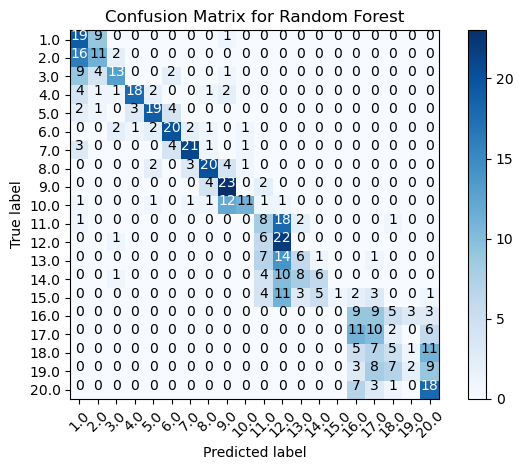

In [524]:
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(df1_target_test, df1_rf_pred)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot the confusion matrix
class_names = label_encoder.classes_
plot_confusion_matrix(cm, classes=class_names, title='Confusion Matrix for Random Forest')
plt.show()

#### XG-Boost

In [527]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

display(df1_target_test)
display(df1_pred_xg)

print("Confusion Matrix:")
print(confusion_matrix(df1_target_test, df1_pred_xg))
print()

print("Accuracy: {}".format(accuracy_score(df1_target_test, df1_pred_xg)))

array([ 1,  3, 12,  8,  8, 14,  6, 19,  3,  6, 13,  9, 12,  1,  3, 17, 11,
        5,  6, 15,  1,  3, 16,  1, 13, 14,  7,  0, 17, 12,  5,  5, 14, 19,
       14,  1, 12,  5,  8, 10, 14, 18, 16,  0,  2,  4,  9, 13, 10, 15, 10,
       19, 17, 14, 13, 15,  5,  5, 17, 11, 19, 11,  7,  3,  0,  4,  5,  8,
        6,  4, 15,  1, 19, 16, 19,  2,  2,  8,  1, 15, 10,  4,  9, 11,  4,
       11, 18, 15, 16,  4, 11, 15, 11,  4,  0, 17,  2,  6,  9,  9,  8,  7,
        8, 17, 10, 18,  2,  7,  3,  7,  0,  2, 18, 12,  5, 12,  4,  1,  5,
        5, 19, 17,  2,  5,  4, 16,  9,  9,  1,  5,  1, 15, 14,  6,  3,  6,
       15,  6,  7, 10,  5,  0,  0,  2,  1, 11, 10,  7, 10,  6,  1,  0,  6,
       10, 10, 10,  2, 10,  8,  3,  5,  2,  1, 15,  7, 16, 19, 12,  5, 10,
        3, 11, 10,  1,  0, 14, 14, 12,  0, 18,  2, 19, 11,  7, 17, 13,  1,
        6, 12, 10, 13,  8, 14,  7,  1, 13, 19, 14, 17,  0,  6, 16,  6, 12,
        8, 19, 16,  3, 19, 19, 11,  4, 10, 18,  5, 16, 14, 18,  4, 17,  4,
        3,  3, 18,  5,  1

array([ 3,  3, 12,  8,  8, 14,  7, 19,  3,  6, 13,  9, 12,  1,  3, 17, 10,
        5,  6, 18,  1,  3, 16,  1, 13, 14,  7,  0, 17, 14,  5,  5, 14, 19,
       19,  0, 10,  5,  8, 10, 14, 16, 16,  0,  2,  4, 13, 13, 10, 15, 13,
       17, 19, 14, 14, 19,  4,  5, 16, 11, 19, 11,  8,  3,  0,  4,  5,  8,
        6,  4, 17,  1, 19, 15, 17,  2,  5,  8,  1, 15, 10,  4,  7, 11,  4,
       11, 17, 15, 15,  4, 11, 15, 13,  4,  0, 18,  2,  0,  9,  9, 10,  8,
        8, 17, 10, 18,  2,  7,  2,  3,  0,  2, 18, 12,  5, 12,  4,  1,  5,
        6, 19, 18,  2,  5,  4, 15,  9,  9,  1,  6,  1, 16, 18,  5,  7,  6,
       16,  7,  7, 13,  5,  0,  0,  2,  1, 11, 10,  7, 10,  6,  6,  0,  6,
       10,  9, 10,  6, 14,  8,  3,  7,  5,  1, 15,  7, 17, 16, 12,  2, 10,
        3, 10, 10,  1,  3, 14, 14, 12,  0, 18,  1, 19, 12,  5, 16, 12,  1,
        6, 12, 10, 12,  7, 14,  8,  1, 13, 17, 14, 18,  0,  7, 15,  6, 12,
        8, 19, 16,  3, 18, 19, 12,  4, 10, 17,  6, 16, 18, 18,  4, 16,  4,
        3,  3, 18,  9,  1

Confusion Matrix:
[[27  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 24  1  1  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3 21  2  0  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2 24  0  0  0  1  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3 24  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  2  1  2 16  6  1  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  3 21  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  1  4 18  5  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4 22  1  2  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  1  1  4 20  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1 23  2  0  2  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  7 17  2  2  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  3 21  0  2  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  3  6 16  4  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  5 18  0  0  1  2  3]
 [ 0  0  0  0  0  0  0  0  0  0  0  0

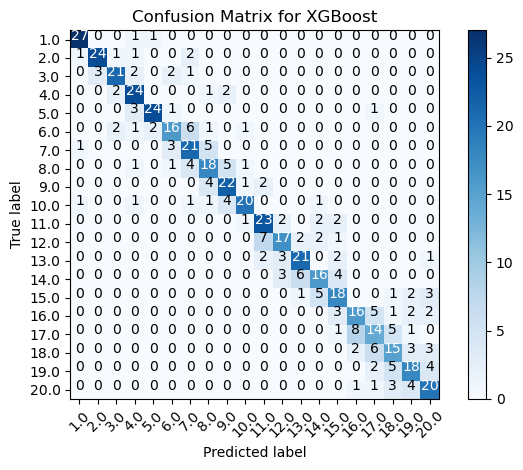

In [528]:
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

# Compute confusion matrix for df1_pred_xg
cm_xg = confusion_matrix(df1_target_test, df1_pred_xg)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot the confusion matrix for XGBoost
class_names = label_encoder.classes_
plot_confusion_matrix(cm_xg, classes=class_names, title='Confusion Matrix for XGBoost')
plt.show()

### Mean Squared Error

#### Random Forrest

In [525]:
#Mean Squared Error Random Forrest

from sklearn.metrics import mean_squared_error

# Berechne den MSE
mse = mean_squared_error(df1_target_test, df1_rf_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3.2414383561643834


#### XG-Boost

In [526]:
#Mean Squared Error XG-Boost

from sklearn.metrics import mean_squared_error

# Berechne den MSE
mse = mean_squared_error(df1_target_test, df1_pred_xg)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.8664383561643836


### Classification Report (Recall and Precision)

#### Random Forrest

In [530]:
display(label_encoder.classes_)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20.])

In [532]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(df1_target_test, df1_rf_pred, target_names=label_encoder.classes_.astype(str)))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.35      0.66      0.45        29
         2.0       0.42      0.38      0.40        29
         3.0       0.65      0.45      0.53        29
         4.0       0.82      0.62      0.71        29
         5.0       0.73      0.66      0.69        29
         6.0       0.67      0.69      0.68        29
         7.0       0.78      0.70      0.74        30
         8.0       0.71      0.67      0.69        30
         9.0       0.53      0.79      0.64        29
        10.0       0.79      0.38      0.51        29
        11.0       0.25      0.27      0.26        30
        12.0       0.29      0.76      0.42        29
        13.0       0.32      0.21      0.25        29
        14.0       0.50      0.21      0.29        29
        15.0       1.00      0.03      0.06        30
        16.0       0.24      0.31      0.27        29
        17.0       0.24      0.34      0.29        29
    

#### Random Forrest

In [533]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(df1_target_test, df1_pred_xg, target_names=label_encoder.classes_.astype(str)))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.90      0.93      0.92        29
         2.0       0.89      0.83      0.86        29
         3.0       0.81      0.72      0.76        29
         4.0       0.71      0.83      0.76        29
         5.0       0.89      0.83      0.86        29
         6.0       0.70      0.55      0.62        29
         7.0       0.60      0.70      0.65        30
         8.0       0.60      0.60      0.60        30
         9.0       0.67      0.76      0.71        29
        10.0       0.83      0.69      0.75        29
        11.0       0.68      0.77      0.72        30
        12.0       0.68      0.59      0.63        29
        13.0       0.70      0.72      0.71        29
        14.0       0.62      0.55      0.58        29
        15.0       0.58      0.60      0.59        30
        16.0       0.59      0.55      0.57        29
        17.0       0.48      0.48      0.48        29
    

### Cross Validation

In [ ]:
#Implement a cross validation split to get a better estimate about performance of used models.
#Example for Random Forrest

### Visual Evaluation (ROC Curves)

Classifiers necessary which deliver confidence scores of their predicitons. It has to be possible to apply the  ```predict_proba()``` function.

# Modell 2

In [534]:
#Modell 2

df2 = pd.read_csv('../data/processed/export_2018_v1.csv') #Auch von 2018-2024
 

In [535]:
# Zeile mit dem höchsten Jahr
max_year_entry = df2[df2['year'] == df2['year'].max()]
print("Zeile mit dem höchsten Jahr:")
display(max_year_entry)

# Zeile mit dem niedrigsten Jahr
min_year_entry = df2[df2['year'] == df2['year'].min()]
print("Zeile mit dem niedrigsten Jahr:")
display(min_year_entry)

KeyError: 'year'

# Modell 3 - Daten 1950-1996

Folgende Probleme: Viele NaN Werte bei Position

Welche attribute sollen wir nehmen? Es gibt quasi keine vernünftigen wie standings etc.

In [457]:
# Modell 3

df3 = pd.read_csv('../data/processed/export_v1.csv') #Daten von 1950-2024

/var/folders/gt/wnv6zp0s7w92jy1_p2n6shsr0000gn/T/ipykernel_81176/2581890540.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('../data/processed/export_v1.csv') #Daten von 1950-2024


## Preprocessing

In [459]:
# Wähle nur den Teil des df3, der in der Spalte 'year' Werte zwischen 1950-1996 hat
df3 = df3[(df3['year'] >= 1950) & (df3['year'] <= 1996)]
df3.tail()

,resultId,raceId,driverId,constructorId,number,grid,year,round,circuitId,race_name,race_date,race_time,fp1_date,fp2_date,fp3_date,fp1_time,fp2_time,fp3_time,quali_time,quali_date,race_location,race_country,race_lat,race_lng,race_alt,q1,q2,q3,position,driver_dob,driver_nationality,driver_code,min_pit_stop_duration,max_pit_stop_duration,avg_pit_stop_duration,std_pit_stop_duration,milliseconds_count,pit_stop_count,min_pit_stop_lap,max_pit_stop_lap,avg_pit_stop_lap,std_pit_stop_lap,avg_pit_stop_driver,avg_pit_stop_team,avg_pit_stop_track,avg_pit_stop_season,rolling_avg_pit_stop_driver,rolling_avg_pit_stop_team,rolling_avg_pit_stop_track,rolling_avg_pit_stop_season
20318,20321,728,410,172,17,0,1963,10,56,South African Grand Prix,1963-12-28,\N,\N,\N,\N,\N,\N,\N,\N,\N,Eastern Cape Province,South Africa,-33.0486,27.87360,15,NaN,NaN,NaN,NaN,1938-09-25,South African,\N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20319,20322,728,305,26,\N,0,1963,10,56,South African Grand Prix,1963-12-28,\N,\N,\N,\N,\N,\N,\N,\N,\N,Eastern Cape Province,South Africa,-33.0486,27.87360,15,NaN,NaN,NaN,NaN,1940-04-02,British,\N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24297,24303,745,418,172,21,15,1961,8,46,United States Grand Prix,1961-10-08,\N,\N,\N,\N,\N,\N,\N,\N,\N,New York State,USA,42.3369,-76.92720,485,NaN,NaN,NaN,NaN,1932-02-29,American,\N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24298,24304,717,373,172,2,1,1964,9,46,United States Grand Prix,1964-10-04,\N,\N,\N,\N,\N,\N,\N,\N,\N,New York State,USA,42.3369,-76.92720,485,NaN,NaN,NaN,NaN,1936-03-04,British,\N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24299,24305,633,333,199,17,18,1971,2,49,Spanish Grand Prix,1971-04-18,\N,\N,\N,\N,\N,\N,\N,\N,\N,Barcelona,Spain,41.3664,2.15167,79,NaN,NaN,NaN,NaN,1941-10-03,Italian,\N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [462]:
# Sortiere den DataFrame df3 absteigend nach race_date
df3 = df3.sort_values(by='race_date', ascending=False)
df3.tail()

,resultId,raceId,driverId,constructorId,number,grid,year,round,circuitId,race_name,race_date,race_time,fp1_date,fp2_date,fp3_date,fp1_time,fp2_time,fp3_time,quali_time,quali_date,race_location,race_country,race_lat,race_lng,race_alt,q1,q2,q3,position,driver_dob,driver_nationality,driver_code,min_pit_stop_duration,max_pit_stop_duration,avg_pit_stop_duration,std_pit_stop_duration,milliseconds_count,pit_stop_count,min_pit_stop_lap,max_pit_stop_lap,avg_pit_stop_lap,std_pit_stop_lap,avg_pit_stop_driver,avg_pit_stop_team,avg_pit_stop_track,avg_pit_stop_season,rolling_avg_pit_stop_driver,rolling_avg_pit_stop_team,rolling_avg_pit_stop_track,rolling_avg_pit_stop_season
20041,20042,833,589,105,19,11,1950,1,9,British Grand Prix,1950-05-13,\N,\N,\N,\N,\N,\N,\N,\N,\N,Silverstone,UK,52.0786,-1.01694,153,NaN,NaN,NaN,NaN,1899-08-03,Monegasque,\N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20040,20041,833,640,105,20,8,1950,1,9,British Grand Prix,1950-05-13,\N,\N,\N,\N,\N,\N,\N,\N,\N,Silverstone,UK,52.0786,-1.01694,153,NaN,NaN,NaN,NaN,1914-05-18,Swiss,\N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20039,20040,833,785,126,24,17,1950,1,9,British Grand Prix,1950-05-13,\N,\N,\N,\N,\N,\N,\N,\N,\N,Silverstone,UK,52.0786,-1.01694,153,NaN,NaN,NaN,NaN,1921-05-11,British,\N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20042,20043,833,789,154,17,7,1950,1,9,British Grand Prix,1950-05-13,\N,\N,\N,\N,\N,\N,\N,\N,\N,Silverstone,UK,52.0786,-1.01694,153,NaN,NaN,NaN,NaN,1915-03-24,French,\N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20029,20030,833,619,151,12,13,1950,1,9,British Grand Prix,1950-05-13,\N,\N,\N,\N,\N,\N,\N,\N,\N,Silverstone,UK,52.0786,-1.01694,153,NaN,NaN,NaN,NaN,1914-01-19,British,\N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Folgende Attribute für das Modell von 1950-1996

target: position

raceID, driverId, constuctorId, year, circuitId

grid, , race_date, q1, q2,q3, driver_nationality,

driver_dob --> age

race_location, race_lat, race_alt

In [463]:
# Wähle nur die angegebenen Spalten aus df3_filtered aus
df3 = df3[['position','driver_dob', 'raceId', 'driverId', 'constructorId', 'year', 'circuitId', 'grid', 'race_date', 'q1', 'driver_nationality', 'race_location', 'race_lat', 'race_alt']]
df3.tail()

,position,driver_dob,raceId,driverId,constructorId,year,circuitId,grid,race_date,q1,driver_nationality,race_location,race_lat,race_alt
20041,NaN,1899-08-03,833,589,105,1950,9,11,1950-05-13,NaN,Monegasque,Silverstone,52.0786,153
20040,NaN,1914-05-18,833,640,105,1950,9,8,1950-05-13,NaN,Swiss,Silverstone,52.0786,153
20039,NaN,1921-05-11,833,785,126,1950,9,17,1950-05-13,NaN,British,Silverstone,52.0786,153
20042,NaN,1915-03-24,833,789,154,1950,9,7,1950-05-13,NaN,French,Silverstone,52.0786,153
20029,NaN,1914-01-19,833,619,151,1950,9,13,1950-05-13,NaN,British,Silverstone,52.0786,153


In [465]:
df3.shape

(15603, 14)

In [464]:
# Zeige alle Zeilen, die NaN in der Spalte 'position' haben
nan_position_rows = df3[df3['position'].isna()]
display(nan_position_rows)

,position,driver_dob,raceId,driverId,constructorId,year,circuitId,grid,race_date,q1,driver_nationality,race_location,race_lat,race_alt
4707,NaN,1971-03-27,239,14,1,1996,22,8,1996-10-13,NaN,British,Suzuka,34.8431,45
4712,NaN,1968-07-27,239,73,29,1996,22,19,1996-10-13,NaN,Brazilian,Suzuka,34.8431,45
4711,NaN,1972-03-20,239,83,18,1996,22,18,1996-10-13,NaN,Portuguese,Suzuka,34.8431,45
4700,NaN,1960-09-17,239,71,3,1996,22,2,1996-10-13,NaN,British,Suzuka,34.8431,45
4719,NaN,1958-02-18,239,86,18,1996,22,20,1996-10-13,NaN,Italian,Suzuka,34.8431,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20041,NaN,1899-08-03,833,589,105,1950,9,11,1950-05-13,NaN,Monegasque,Silverstone,52.0786,153
20040,NaN,1914-05-18,833,640,105,1950,9,8,1950-05-13,NaN,Swiss,Silverstone,52.0786,153
20039,NaN,1921-05-11,833,785,126,1950,9,17,1950-05-13,NaN,British,Silverstone,52.0786,153
20042,NaN,1915-03-24,833,789,154,1950,9,7,1950-05-13,NaN,French,Silverstone,52.0786,153


14600x NaN bei Position ... ja moin

In [466]:
# Filter rows in df1 where q1 is NaN or '\N'
nan_q1_rows = df1[(df1['q1'].isna()) | (df1['q1'] == '\\N')]
display(nan_q1_rows)

,raceId,driverId,constructorId,grid,year,circuitId,race_lat,race_lng,race_alt,q1,q2,q3,position,driver_nationality,min_pit_stop_duration,max_pit_stop_duration,avg_pit_stop_duration,std_pit_stop_duration,milliseconds_count,pit_stop_count,min_pit_stop_lap,max_pit_stop_lap,avg_pit_stop_lap,std_pit_stop_lap,avg_pit_stop_driver,avg_pit_stop_team,avg_pit_stop_track,avg_pit_stop_season,rolling_avg_pit_stop_driver,rolling_avg_pit_stop_team,rolling_avg_pit_stop_track,rolling_avg_pit_stop_season,age


In [467]:
# Filter rows in df3 where q1 is not NaN or '\N'
df3_filtered_q1 = df3[(df3['q1'].notna()) & (df3['q1'] != '\\N')]
display(df3_filtered_q1)

,position,driver_dob,raceId,driverId,constructorId,year,circuitId,grid,race_date,q1,driver_nationality,race_location,race_lat,race_alt
4529,14.0,1971-03-27,230,14,1,1996,4,14,1996-06-02,1:23.416,British,Montmeló,41.5700,109
4531,18.0,1972-03-20,230,83,18,1996,4,18,1996-06-02,1:25.274,Portuguese,Montmeló,41.5700,109
4530,20.0,1968-07-27,230,73,29,1996,4,20,1996-06-02,1:25.621,Brazilian,Montmeló,41.5700,109
4515,11.0,1967-05-18,230,49,15,1996,4,11,1996-06-02,1:23.195,German,Montmeló,41.5700,109
4528,19.0,1973-01-14,230,21,18,1996,4,19,1996-06-02,1:25.531,Italian,Montmeló,41.5700,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5142,10.0,1963-05-29,257,79,25,1994,18,10,1994-03-27,1:18.194,Japanese,São Paulo,-23.7036,785
5144,21.0,1964-06-25,257,65,32,1994,18,21,1994-03-27,1:19.483,British,São Paulo,-23.7036,785
5143,7.0,1968-12-20,257,91,15,1994,18,7,1994-03-27,1:17.927,Austrian,São Paulo,-23.7036,785
5141,14.0,1972-05-23,257,22,17,1994,18,14,1994-03-27,1:18.414,Brazilian,São Paulo,-23.7036,785


### Calculating Driver Age

In [437]:
# Calculate Driver Age for df3

# Ensure df3 is defined
df3['race_date'] = pd.to_datetime(df3['race_date'])
df3['driver_dob'] = pd.to_datetime(df3['driver_dob'])

# Calculate age
df3['age'] = df3.apply(lambda row: row['race_date'].year - row['driver_dob'].year - ((row['race_date'].month, row['race_date'].day) < (row['driver_dob'].month, row['driver_dob'].day)), axis=1)

# Drop driver_dob column
df3 = df3.drop(columns=['driver_dob'])
df3 = df3.drop(columns=['race_date'])

df3.head()

,position,raceId,driverId,constructorId,year,circuitId,grid,q1,q2,q3,driver_nationality,race_location,race_lat,race_alt,age
4380,2.0,224,71,3,1996,1,2,1:32.509,\N,\N,British,Melbourne,-37.8497,10,35
4381,1.0,224,35,3,1996,1,1,1:32.371,\N,\N,Canadian,Melbourne,-37.8497,10,24
4382,3.0,224,56,6,1996,1,3,1:32.889,\N,\N,British,Melbourne,-37.8497,10,30
4383,7.0,224,77,22,1996,1,7,1:34.344,\N,\N,Austrian,Melbourne,-37.8497,10,36
4384,5.0,224,57,1,1996,1,5,1:34.054,\N,\N,Finnish,Melbourne,-37.8497,10,27


# Ensembles

Let the different models vote for final prediction.

Possabilities: 
Stacking,
Voting

### Stacking

Stacking example for the Random Forrest and Naive Bayes Classifier with a Decision Tree classifier as the meta classifier.

In [ ]:
#Stacking Example for Naive Bayes and Random Forrest

from sklearn.tree import DecisionTreeClassifier #Meta Learner
from sklearn.preprocessing import LabelEncoder

# Stacking: scikit-learn has no implementation for Stacking. You can use this -> https://rasbt.gith2ub.io/mlxtend/
# HINT: mlxtend can only work with numerical labels. You can use the LabelEncoder to transform your labels.

from mlxtend.classifier import StackingClassifier

estimators = {'RandomForrest': RandomForestClassifier(max_depth=2, random_state=0), 'NaiveBayes': GaussianNB()} #Possible to extend to even more classifiers

encoder = LabelEncoder()
df_target_train_encoded = encoder.fit_transform(df_target_train)
df_target_test_encoded = encoder.transform(df_target_test)

ensemble = StackingClassifier(
    classifiers=list(estimators.values()),
    meta_classifier=DecisionTreeClassifier()
)
estimators['Stacking'] = ensemble

for e_name, e in estimators.items():
    evaluate_classifier(e_name, e, df_train_wo_target, df_target_train_encoded, df_test_wo_target, df_target_test)

#Does it improve accuracy?